In [1]:

'''
Add bets places on top 2 metric 
    - Placed is doing better so maybe this will also
    
Add bets placed on the second favourite model
    - ??
'''


'\nAdd bets places on top 2 metric \n    - Placed is doing better so maybe this will also\n    \nAdd bets placed on the second favourite model\n    - ??\n'


# Classification Evaluation Metrics


In [2]:

#fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one/code/Users/karan.bhatti'
fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/Dataprep'

import sys
print(sys.path)
print()
#sys.path.append(f'{fileloc}')
print()
#print(sys.path)


['/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/Code', '/anaconda/envs/azureml_py38/lib/python38.zip', '/anaconda/envs/azureml_py38/lib/python3.8', '/anaconda/envs/azureml_py38/lib/python3.8/lib-dynload', '', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/_project/vendor', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/automl/core/_vendor']




In [3]:

from datetime import datetime
import pytz

# Get the current UTC time
utc_now = datetime.now(pytz.utc)

# Convert it to local time
#local_tz = pytz.timezone('America/Los_Angeles')  # Replace with your timezone
local_tz = pytz.timezone('Asia/Kolkata')  # Set timezone to India (IST)
local_now = utc_now.astimezone(local_tz)

print(local_now)

2023-07-07 16:15:18.518640+05:30


In [4]:

class Data(object):
    pass

df = Data
summ = Data


In [5]:
import helpdesk as hd

In [6]:
# Import writer class from csv module
from csv import writer

import pandas as pd, numpy as np

import random, time


In [7]:

DEBUG = True
seed = 1919


In [8]:

pd.set_option('display.max_rows', 50);
pd.set_option('display.max_columns', 50);
pd.set_option('display.width', 200);


In [9]:
#%run "C040_MDL_NN w TensorFlow.ipynb"

In [10]:

# Get all files in the directory
files = os.listdir(fileloc)

# Print the list of files
#for file in files:
#    print(file)
    
# Sort the files by type in descending order
sorted_files = sorted(files, key=lambda x: x.split('_')[-1].split('.')[0], reverse=True)

# Print the top 3 files
for file in sorted_files[:3]:
    print(file)


evaluation_2022-11-20_extended_totals.csv
evaluation_2022-11-24_extended_totals.csv
missing.csv


In [11]:

# Define your file location
#fileloc = '/your/directory/path'

# Get all files in the directory
files = os.listdir(fileloc)

# Create an empty dictionary to store file categories
file_dict = {}

# Regular expression pattern for numbers and dates
number_pattern = re.compile(r'^\d+$')
date_pattern = re.compile(r'^\d{4}-\d{2}-\d{2}$')

"""
# Categorize files by type based on their name
for file in files:
    file_type = file.split('_')[0]  # type is determined by the first part of the file name before underscore
    if file_type in file_dict:
        file_dict[file_type].append(file)
    else:
        file_dict[file_type] = [file]
        
# Categorize files by type based on their name
for file in files:
    file_parts = file.split('_', 2)
    if len(file_parts) > 2:
        file_type = file_parts[0] + "_" + file_parts[1]
        if file_type in file_dict:
            file_dict[file_type].append(file)
        else:
            file_dict[file_type] = [file]
"""
            
# Categorize files by type based on their name
for file in files:
    file_parts = file.split('_', 2)
    if len(file_parts) > 2:
        right_part = file_parts[1]
        
        # Check if the right part is not a number and not a date
        if not number_pattern.match(right_part) and not date_pattern.match(right_part):
            file_type = file_parts[0] + "_" + right_part
        else:
            file_type = file_parts[0]
        
        if file_type in file_dict:
            file_dict[file_type].append(file)
        else:
            file_dict[file_type] = [file]
                          

# Sort the files in each category and print the first three
for file_type, file_list in file_dict.items():
    file_list.sort()  # this sorts the files alphabetically, change this if you need a different order
    print()
    print(f'File type: {file_type}')
    for file in file_list:
        print(file)
        


File type: dataprep_categorical
dataprep_categorical_2022-11-25.csv
dataprep_categorical_2022-11-27.csv
dataprep_categorical_2022-11-28.csv
dataprep_categorical_2022-12-03.csv
dataprep_categorical_2023-02-22.csv
dataprep_categorical_2023-06-07.csv

File type: dataprep_performance
dataprep_performance_2022-11-27.csv
dataprep_performance_2022-11-28.csv
dataprep_performance_2022-12-03.csv
dataprep_performance_2023-02-22.csv
dataprep_performance_2023-06-07.csv
dataprep_performance_2023-06-08.csv

File type: dataprep_raceprofile
dataprep_raceprofile_2022-10-29.csv
dataprep_raceprofile_2022-11-27.csv
dataprep_raceprofile_2022-11-28.csv
dataprep_raceprofile_2022-12-03.csv
dataprep_raceprofile_2023-02-22.csv
dataprep_raceprofile_2023-06-07.csv

File type: dataprep_speed
dataprep_speed_profile_2022-10-27.csv
dataprep_speed_profile_2022-11-27.csv
dataprep_speed_profile_2022-11-28.csv
dataprep_speed_profile_2022-12-03.csv
dataprep_speed_profile_2023-02-22.csv
dataprep_speed_profile_2023-06-06.cs

In [12]:

# Sort the files in each category and print the first three
for file_type, file_list in file_dict.items():
    file_list.sort()  # this sorts the files alphabetically, change this if you need a different order
    if file_type in ['predictions','dataset_base']:
        print()
        print(f'File type: {file_type}')
        for file in file_list:
            print(file)



File type: dataset_base
dataset_base_2022-10-27.csv
dataset_base_2022-11-25.csv
dataset_base_2022-11-27.csv
dataset_base_2022-11-28.csv
dataset_base_2022-12-03.csv
dataset_base_2022-12-12.csv
dataset_base_2022-12-16.csv
dataset_base_2023-02-09.csv
dataset_base_2023-06-05.csv
dataset_base_doggrading_2022-12-22.csv
dataset_base_doggrading_2023-02-22.csv
dataset_base_doggrading_2023-06-07.csv

File type: predictions
predictions_28112183_2023-06-14.csv
predictions_28112237_2023-06-14.csv
predictions_28112304_2023-06-14.csv
predictions_28115042_2023-06-16.csv
predictions_28145385_2023-07-07.csv
predictions_28145414_2023-07-07.csv
predictions_28145433_2023-07-07.csv


In [13]:

#preds_dataset_name = 'predictions_dataset_2022-10-18.csv'
#preds_dataset_name = 'predictions_dataset_2022-10-27.csv'

#preds_dataset_name = f'predictions_dataset_{mid}_2023-02-23.csv'

#preds_dataset_name = 'predictions_28112237_2023-06-14.csv' # raceloss 
#preds_dataset_name = 'predictions_28112304_2023-06-14.csv' # raceloss_fv1  

#preds_dataset_name = 'predictions_28145385_2023-07-07.csv' # raceloss 
#preds_dataset_name = 'predictions_28145414_2023-07-07.csv'# raceloss_fv1
preds_dataset_name = 'predictions_28145433_2023-07-07.csv'# raceloss_fv1

df_preds = pd.read_csv(f'{fileloc}/{preds_dataset_name}')

print(df_preds.shape)
print()
print(df_preds.columns.values.tolist())


(242327, 10)

['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'yearqtr', 'yearmon', 'ttflag', 'preds', 'mid']


In [14]:

dataset_base = f'dataset_base_2023-06-05.csv'

df_base = pd.read_csv(f'{fileloc}/{dataset_base}')

print(df_base.shape)
print()
print(df_base.columns.values.tolist())


(725080, 45)

['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'Prizemoney', 'TrainerId', 'TrainerName', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc_to_win', 'h_rand_all_plc_to_win', 'p_rand_all_plc_to_win', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last']


In [15]:

print(df_preds.shape)
print(df_base.shape)

df_eval_raw = pd.merge(df_preds, df_base, on = ['@id_DOG','@id_RACE'], how = 'inner')

print(df_eval_raw.shape)
print(df_eval_raw.columns.values.tolist())



(242327, 10)
(725080, 45)
(242327, 53)
['@id_DOG', 'DogName_x', 'y_runtime_x', 'RaceId_x', '@id_RACE', 'yearqtr', 'yearmon', 'ttflag', 'preds', 'mid', 'DogName_y', 'y_runtime_y', 'RaceId_y', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'Prizemoney', 'TrainerId', 'TrainerName', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc_to_win', 'h_rand_all_plc_to_win', 'p_rand_all_plc_to_win', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last']


In [16]:
# Plotting the RaceGrade

In [17]:

print(pd.DataFrame(df_eval_raw.isna().sum()).transpose())


   @id_DOG  DogName_x  y_runtime_x  RaceId_x  @id_RACE  yearqtr  yearmon  ttflag  preds  mid  DogName_y  y_runtime_y  RaceId_y  Distance  RaceGrade  Track  Event_Dt  Prizemoney  TrainerId  \
0        0          0            0         0         0        0        0       0      0    0          0            0         0         0          0      0         0       75679          0   

   TrainerName  ft_sp  x_num_dogs  position  y_margin  y_pos  ...  rand_uniform  position_random  Winner_random  Top3_random  position_fasttrack  Winner_fastrack  Top3_fastrack  rand_1  h_rand_1  \
0            0      0           0         0         0      0  ...             0                0              0            0                   0                0              0       0         0   

   p_rand_1  rand_all_plc_to_win  h_rand_all_plc_to_win  p_rand_all_plc_to_win  rand_lay_last  h_rand_lay_last  p_rand_lay_last  ft_1  h_ft_1  p_ft_1  ft_all_plc  h_ft_all_plc  p_ft_all_plc  \
0         0                

In [18]:

df_eval_raw.describe()


,@id_DOG,y_runtime_x,RaceId_x,@id_RACE,yearqtr,yearmon,preds,mid,y_runtime_y,RaceId_y,Prizemoney,TrainerId,ft_sp,x_num_dogs,position,y_margin,y_pos,Winner_actual,Top3_actual,rand_mean,rand_uniform,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,rand_1,h_rand_1,p_rand_1,rand_all_plc_to_win,h_rand_all_plc_to_win,p_rand_all_plc_to_win,rand_lay_last,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last
count,2.423270e+05,242327.000000,2.423270e+05,2.423270e+05,242327.000000,242327.000000,242327.000000,242327.0,242327.000000,2.423270e+05,166648.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.0,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000
mean,5.733993e+08,24.264758,8.534225e+08,8.534225e+08,202247.379004,202251.518444,4.704718,28145433.0,24.264758,8.534225e+08,483.318930,117010.211404,17.410220,7.377358,4.186764,6.446790,4.186764,0.138078,0.413862,0.5,0.500311,4.188679,0.137834,0.413503,4.049078,0.141759,0.430959,0.137834,0.019721,-0.033245,0.350559,0.048756,-0.085674,0.137834,0.118423,-0.397658,0.141759,0.057319,-0.019914,0.364928,0.099634,-0.062395,0.102651,0.100831,-0.176951
std,9.492440e+07,4.931257,2.522906e+07,2.522906e+07,48.592068,46.109203,1.718964,0.0,4.931257,2.522906e+07,3419.469343,84386.239018,21.945362,0.872700,2.169415,4.852521,2.169415,0.344982,0.492525,0.0,0.999483,2.169333,0.344727,0.492462,2.092442,0.348803,0.495211,0.344727,0.139041,1.137970,0.477146,0.215359,1.844518,0.344727,0.323109,5.942428,0.348803,0.232452,0.424732,0.481411,0.299512,0.954681,0.303503,0.301105,7.794055
min,1.351337e+08,15.330000,8.076312e+08,8.076312e+08,202203.000000,202208.000000,-0.394402,28145433.0,15.330000,8.076312e+08,0.000000,6418.000000,0.700000,5.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.5,-3.845780,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-505.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-505.000000
25%,5.206434e+08,20.430000,8.292899e+08,8.292899e+08,202204.000000,202210.000000,3.435350,28145433.0,20.430000,8.292899e+08,0.000000,65976.000000,4.200000,7.000000,2.000000,2.570000,2.000000,0.000000,0.000000,0.5,-0.176366,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
50%,5.789005e+08,23.390000,8.540603e+08,8.540603e+08,202204.000000,202212.000000,4.355521,28145433.0,23.390000,8.540603e+08,100.000000,100313.000000,8.600000,8.000000,4.000000,5.520000,4.000000,0.000000,0.000000,0.5,0.499284,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.476157e+08,26.740000,8.751761e+08,8.751761e+08,202301.000000,202302.000000,5.613879,28145433.0,26.740000,8.751761e+08,460.000000,127987.000000,21.000000,8.000000,6.000000,9.250000,6.000000,0.000000,1.000000,0.5,1.175161,6.000000,0.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.071650e+09,53.290000,8.978632e+08,8.978632e+08,202302.000000,202305.000000,16.121778,28145433.0,53.290000,8.978632e+08,1000000.000000,337600.000000,410.000000,8.000000,8.000000,27.000000,8.000000,1.000000,1

In [19]:

df_eval_raw.head()


,@id_DOG,DogName_x,y_runtime_x,RaceId_x,@id_RACE,yearqtr,yearmon,ttflag,preds,mid,DogName_y,y_runtime_y,RaceId_y,Distance,RaceGrade,Track,Event_Dt,Prizemoney,TrainerId,TrainerName,ft_sp,x_num_dogs,position,y_margin,y_pos,...,rand_uniform,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,rand_1,h_rand_1,p_rand_1,rand_all_plc_to_win,h_rand_all_plc_to_win,p_rand_all_plc_to_win,rand_lay_last,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last
0,135133731,SOUTHWOOD MIA,20.41,811481246,811481246,202203,202208,Train,9.845912,28145433,SOUTHWOOD MIA,20.41,811481246,340m,Grade 5,Gunnedah,2022-08-04,0.0,62451,S Howarth,101.0,8,8,12.25,8,...,-0.004942,6.0,0,0,7.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0.0
1,140577118,PHANTOM OWL,18.26,820706339,820706339,202203,202209,Train,4.118066,28145433,PHANTOM OWL,18.26,820706339,324m,Masters Grade 3,Richmond,2022-09-03,350.0,99649,C Pollard,18.0,8,3,4.50,3,...,1.559086,3.0,0,1,6.0,0,0,0,0,0.0,1,0,-1.0,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0.0
2,148673258,SPEEDY MARINA,18.51,807631353,807631353,202203,202208,Train,9.851160,28145433,SPEEDY MARINA,18.51,807631353,307m,Grade 5,Bathurst,2022-08-01,0.0,65928,D Lee,101.0,8,7,8.25,7,...,1.271594,2.0,0,1,7.0,0,0,0,0,0.0,1,0,-1.0,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0.0
3,148673258,SPEEDY MARINA,19.22,820735785,820735785,202203,202209,Train,10.140045,28145433,SPEEDY MARINA,19.22,820735785,318m,Grade 5,Dubbo,2022-09-03,0.0,65928,D Lee,101.0,8,7,12.25,7,...,0.444187,6.0,0,0,8.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0,0.0,1.0,1,1.0
4,148673258,SPEEDY MARINA,17.88,824820637,824820637,202203,202209,Train,6.712150,28145433,SPEEDY MARINA,17.88,824820637,287m,Grade 5,Lithgow,2022-09-17,0.0,65928,D Lee,11.0,7,4,9.00,4,...,0.559794,5.0,0,0,5.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0.0


In [20]:

df_evaluation = df_eval_raw.copy()


In [21]:

# groupings
groupings = ['@id_RACE']

## Rank for Place Preds
#df_evaluation["position_preds"] = df_evaluation.groupby( groupings )["preds"].rank("dense", ascending=False)
df_evaluation["position_preds"] = df_evaluation.groupby( groupings )["preds"].rank("dense", ascending=True)

# Winner / Place Preds Columns
#df_evaluation['Winner_preds'] = df_evaluation.apply(lambda x : 1 if x.position_preds <= 1 else 0, axis = 1)
df_evaluation['Winner_preds'] = (df_evaluation['position_preds'] <= 1).astype(int)

#df_evaluation['Top3_preds'] = df_evaluation.apply(lambda x : 1 if x.position_preds <= 3 else 0, axis = 1)
df_evaluation['Top3_preds'] = (df_evaluation['position_preds'] <= 3).astype(int)

print(datetime.now())


2023-07-07 10:46:27.667403


In [22]:

df_poscount = df_evaluation.groupby(groupings).agg({'position_preds':'nunique'}).reset_index().rename(columns= {'position_preds':'poscount'})

df_eval_v2 = df_evaluation.merge(df_poscount, on = groupings, how = 'left')

"""
df_eval_v2['preds_tie'] = df_eval_v2.apply(lambda x : 0 if x.x_num_dogs == x.poscount \
                                           else 1 if x.x_num_dogs == x.poscount + 1 \
                                           else 2 if x.x_num_dogs == x.poscount + 2 \
                                           else 3 if x.x_num_dogs == x.poscount + 3 \
                                           else 4 if x.x_num_dogs == x.poscount + 4 \
                                           else 5 if x.x_num_dogs == x.poscount + 5 \
                                           else 6 if x.x_num_dogs == x.poscount + 6 \
                                           else 7 if x.x_num_dogs == x.poscount + 7 \
                                           else 8 if x.x_num_dogs == x.poscount + 8 else 99, axis = 1)
"""

#CGPT optimised
df_eval_v2['preds_tie'] = (df_eval_v2['x_num_dogs'] - df_eval_v2['poscount']).clip(lower=0, upper=8)
df_eval_v2['preds_tie'].where(df_eval_v2['preds_tie'] <= 8, 99, inplace=True)

print()
print(df_eval_v2.shape)
print()
print(df_eval_v2.columns.values.tolist())



(242327, 58)

['@id_DOG', 'DogName_x', 'y_runtime_x', 'RaceId_x', '@id_RACE', 'yearqtr', 'yearmon', 'ttflag', 'preds', 'mid', 'DogName_y', 'y_runtime_y', 'RaceId_y', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'Prizemoney', 'TrainerId', 'TrainerName', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc_to_win', 'h_rand_all_plc_to_win', 'p_rand_all_plc_to_win', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last', 'position_preds', 'Winner_preds', 'Top3_preds', 'poscount', 'preds_tie']


In [23]:

print()
print(df_eval_v2.groupby(['preds_tie']).agg({'@id_RACE':'nunique'}).reset_index())



   preds_tie  @id_RACE
0          0     33081
1          1       273
2          2        38
3          3         6
4          4         2
5          5         1


In [24]:

#df_evaluation[df_evaluation['@id_RACE'].isin([626271182])].head()
df_eval_v2[df_eval_v2['ttflag'].isin(['Test'])].head()


,@id_DOG,DogName_x,y_runtime_x,RaceId_x,@id_RACE,yearqtr,yearmon,ttflag,preds,mid,DogName_y,y_runtime_y,RaceId_y,Distance,RaceGrade,Track,Event_Dt,Prizemoney,TrainerId,TrainerName,ft_sp,x_num_dogs,position,y_margin,y_pos,...,Winner_fastrack,Top3_fastrack,rand_1,h_rand_1,p_rand_1,rand_all_plc_to_win,h_rand_all_plc_to_win,p_rand_all_plc_to_win,rand_lay_last,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last,position_preds,Winner_preds,Top3_preds,poscount,preds_tie
209430,148673258,SPEEDY MARINA,17.36,882009425,882009425,202302,202304,Test,6.951261,28145433,SPEEDY MARINA,17.36,882009425,287m,Mixed 4/5,Lithgow,2023-04-01,50.0,65928,D Lee,8.0,6,4,6.00,4,...,0,0,1,0,-1.0,1,0,-1.0,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,5.0,0,0,6,0
209431,148673258,SPEEDY MARINA,18.27,892812561,892812561,202302,202304,Test,5.560843,28145433,SPEEDY MARINA,18.27,892812561,287m,Mixed 4/5,Lithgow,2023-04-22,0.0,65928,D Lee,13.0,7,7,22.50,7,...,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,5.0,0,0,7,0
209432,148673258,SPEEDY MARINA,17.79,894753244,894753244,202302,202305,Test,8.601190,28145433,SPEEDY MARINA,17.79,894753244,287m,Mixed 4/5,Lithgow,2023-05-06,0.0,65928,D Lee,11.0,6,6,11.75,6,...,0,0,1,0,-1.0,1,0,-1.0,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,6.0,0,0,6,0
209433,161977365,FILTHY PHANTOM,23.05,886871234,886871234,202302,202304,Test,2.902893,28145433,FILTHY PHANTOM,23.05,886871234,400m,Masters,Gawler,2023-04-05,0.0,110385,T Hinrichsen,13.0,7,4,5.25,4,...,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,3.0,0,1,7,0
209434,161977365,FILTHY PHANTOM,23.67,888327609,888327609,202302,202304,Test,4.752397,28145433,FILTHY PHANTOM,23.67,888327609,400m,Masters,Gawler,2023-04-09,0.0,110385,T Hinrichsen,26.0,8,8,7.50,8,...,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,7.0,0,0,8,0


In [25]:

df_eval_v2.describe()


,@id_DOG,y_runtime_x,RaceId_x,@id_RACE,yearqtr,yearmon,preds,mid,y_runtime_y,RaceId_y,Prizemoney,TrainerId,ft_sp,x_num_dogs,position,y_margin,y_pos,Winner_actual,Top3_actual,rand_mean,rand_uniform,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,rand_1,h_rand_1,p_rand_1,rand_all_plc_to_win,h_rand_all_plc_to_win,p_rand_all_plc_to_win,rand_lay_last,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last,position_preds,Winner_preds,Top3_preds,poscount,preds_tie
count,2.423270e+05,242327.000000,2.423270e+05,2.423270e+05,242327.000000,242327.000000,242327.000000,242327.0,242327.000000,2.423270e+05,166648.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.0,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000,242327.000000
mean,5.733993e+08,24.264758,8.534225e+08,8.534225e+08,202247.379004,202251.518444,4.704718,28145433.0,24.264758,8.534225e+08,483.318930,117010.211404,17.410220,7.377358,4.186764,6.446790,4.186764,0.138078,0.413862,0.5,0.500311,4.188679,0.137834,0.413503,4.049078,0.141759,0.430959,0.137834,0.019721,-0.033245,0.350559,0.048756,-0.085674,0.137834,0.118423,-0.397658,0.141759,0.057319,-0.019914,0.364928,0.099634,-0.062395,0.102651,0.100831,-0.176951,4.183306,0.137942,0.414291,7.365927,0.011431
std,9.492440e+07,4.931257,2.522906e+07,2.522906e+07,48.592068,46.109203,1.718964,0.0,4.931257,2.522906e+07,3419.469343,84386.239018,21.945362,0.872700,2.169415,4.852521,2.169415,0.344982,0.492525,0.0,0.999483,2.169333,0.344727,0.492462,2.092442,0.348803,0.495211,0.344727,0.139041,1.137970,0.477146,0.215359,1.844518,0.344727,0.323109,5.942428,0.348803,0.232452,0.424732,0.481411,0.299512,0.954681,0.303503,0.301105,7.794055,2.166906,0.344840,0.492600,0.881496,0.126933
min,1.351337e+08,15.330000,8.076312e+08,8.076312e+08,202203.000000,202208.000000,-0.394402,28145433.0,15.330000,8.076312e+08,0.000000,6418.000000,0.700000,5.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.5,-3.845780,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-505.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-505.000000,1.000000,0.000000,0.000000,3.000000,0.000000
25%,5.206434e+08,20.430000,8.292899e+08,8.292899e+08,202204.000000,202210.000000,3.435350,28145433.0,20.430000,8.292899e+08,0.000000,65976.000000,4.200000,7.000000,2.000000,2.570000,2.000000,0.000000,0.000000,0.5,-0.176366,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,7.000000,0.000000
50%,5.789005e+08,23.390000,8.540603e+08,8.540603e+08,202204.000000,202212.000000,4.355521,28145433.0,23.390000,8.540603e+08,100.000000,100313.000000,8.600000,8.000000,4.000000,5.520000,4.000000,0.000000,0.000000,0.5,0.499284,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,8.000000,0.000000
75%,6.476157e+08,26.740000,8.751761e+08,8.751761e+08,202301.000000,202302.000000,5.613879,28145433.0,26.740000,8.751761e+08,460.000000,127987.000000,21.000000,8.000000,6.000000,9.250000,6.000000,0.000000,1.000000,0.5,1.175161,6.000000,0.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.0

In [26]:

df_eval_v2.sort_values(by = ['@id_RACE','position']).head()


,@id_DOG,DogName_x,y_runtime_x,RaceId_x,@id_RACE,yearqtr,yearmon,ttflag,preds,mid,DogName_y,y_runtime_y,RaceId_y,Distance,RaceGrade,Track,Event_Dt,Prizemoney,TrainerId,TrainerName,ft_sp,x_num_dogs,position,y_margin,y_pos,...,Winner_fastrack,Top3_fastrack,rand_1,h_rand_1,p_rand_1,rand_all_plc_to_win,h_rand_all_plc_to_win,p_rand_all_plc_to_win,rand_lay_last,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last,position_preds,Winner_preds,Top3_preds,poscount,preds_tie
47382,498666857,HES UNDER WRAPS,30.48,807631247,807631247,202203,202208,Train,4.168204,28145433,HES UNDER WRAPS,30.48,807631247,515m,Juvenile Graduation,Launceston,2022-08-01,2145.0,317939,D Howlin,11.0,8,1,0.75,1,...,0,0,0,0,0.0,1,1,10.0,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,2.0,0,1,8,0
172835,656363743,MISS WILDER,30.53,807631247,807631247,202203,202208,Train,3.892155,28145433,MISS WILDER,30.53,807631247,515m,Juvenile Graduation,Launceston,2022-08-01,620.0,93556,P Ryan,5.0,8,2,0.75,2,...,0,1,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1.0,0,-1.0,0.0,0,0.0,1.0,1,1,8,0
191023,677865077,CRIKEY DANGER,30.64,807631247,807631247,202203,202208,Train,4.506787,28145433,CRIKEY DANGER,30.64,807631247,515m,Juvenile Graduation,Launceston,2022-08-01,300.0,92095,A Clark,1.5,8,3,2.25,3,...,1,1,0,0,0.0,0,0,0.0,0,0,0.0,1,0,-1.0,1.0,0,-1.0,0.0,0,0.0,3.0,0,1,8,0
170219,654230927,POSH DANGER,30.75,807631247,807631247,202203,202208,Train,8.986567,28145433,POSH DANGER,30.75,807631247,515m,Juvenile Graduation,Launceston,2022-08-01,100.0,92095,A Clark,16.0,8,4,3.75,4,...,0,0,0,0,0.0,0,0,0.0,1,1,1.0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,8.0,0,0,8,0
27149,449530772,RIP ON BYE,30.92,807631247,807631247,202203,202208,Train,5.687273,28145433,RIP ON BYE,30.92,807631247,515m,Juvenile Graduation,Launceston,2022-08-01,0.0,27643,R Work,10.0,8,5,6.25,5,...,0,1,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1.0,0,-1.0,0.0,0,0.0,4.0,0,0,8,0


In [27]:

df_eval_test = df_eval_v2[df_eval_v2.ttflag.isin(['Test'])]


In [28]:

pd.crosstab(df_eval_test.position, df_eval_test.position_preds)


position_preds,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
position,,,,,,,,
1,1358,1035,710,542,389,231,157,78
2,919,871,759,647,521,384,272,127
3,655,741,699,711,608,529,361,186
4,486,574,683,752,725,608,421,246
5,412,460,611,648,816,713,504,327
6,304,362,496,558,642,853,622,384
7,229,270,345,409,457,579,785,524
8,131,193,211,233,332,328,468,706


In [29]:

df_eval_test.groupby( [ 'ttflag', 'Top3_actual', 'Top3_preds']).agg({'@id_DOG':'count'}).reset_index()


,ttflag,Top3_actual,Top3_preds,@id_DOG
0,Test,0,0,13640
1,Test,0,1,5767
2,Test,1,0,5743
3,Test,1,1,7747


In [30]:

"""
Run on Jun 07

0	0.413223	0.172915
1	0.172705	0.241158

Run on Jul 07
0	0.581615	0.004523
1	0.004795	0.409067


0	0.414011	0.172127
1	0.171764	0.242098

"""


pd.crosstab(df_eval_v2.Top3_actual, df_eval_v2.Top3_preds, normalize='all')



Top3_preds,0,1
Top3_actual,,
0,0.414791,0.171347
1,0.170918,0.242944


In [31]:

"""
Run on 2023 06 (Jun) 07 

0	0.412956	0.176977
1	0.176429	0.233638
"""

"""
Run on 2023 07 (Jul) 07 

0	0.585464	0.004468
1	0.004772	0.405295

0	0.414658	0.175274
1	0.174697	0.235371


"""

pd.crosstab(df_eval_test.Top3_actual, df_eval_test.Top3_preds, normalize='all')



Top3_preds,0,1
Top3_actual,,
0,0.414627,0.175305
1,0.174575,0.235493


In [32]:

"""
Run on 2023 06 (Jun) 07 

0	0.767426	0.095784
1	0.095875	0.040916

"""

"""
Run on 2023 07 (Jul) 07 

0	0.793811	0.069398
1	0.069581	0.067210

0	0.767030	0.096179
1	0.096331	0.040460

"""

pd.crosstab(df_eval_test.Winner_actual, df_eval_test.Winner_preds, normalize='all')


Winner_preds,0,1
Winner_actual,,
0,0.767882,0.095328
1,0.095510,0.041280


In [33]:

df_eval_test.tail(3)


,@id_DOG,DogName_x,y_runtime_x,RaceId_x,@id_RACE,yearqtr,yearmon,ttflag,preds,mid,DogName_y,y_runtime_y,RaceId_y,Distance,RaceGrade,Track,Event_Dt,Prizemoney,TrainerId,TrainerName,ft_sp,x_num_dogs,position,y_margin,y_pos,...,Winner_fastrack,Top3_fastrack,rand_1,h_rand_1,p_rand_1,rand_all_plc_to_win,h_rand_all_plc_to_win,p_rand_all_plc_to_win,rand_lay_last,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last,position_preds,Winner_preds,Top3_preds,poscount,preds_tie
242324,877725796,DANA REX,19.38,894776804,894776804,202302,202305,Test,3.810694,28145433,DANA REX,19.38,894776804,330m,Maiden,Temora,2023-05-05,100.0,65906,R McDonald,3.4,8,4,4.25,4,...,0,1,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1.0,0,-1.0,0.0,0,0.0,3.0,0,1,8,0
242325,889125234,IRINKA LOTTIE,30.27,894753162,894753162,202302,202305,Test,3.012419,28145433,IRINKA LOTTIE,30.27,894753162,516m,Mixed Maiden and Grade Five,Dubbo,2023-05-06,660.0,98996,R Smith,1.4,7,2,0.25,2,...,1,1,0,0,0.0,0,0,0.0,1,1,1.0,1,0,-1.0,1.0,0,-1.0,0.0,0,0.0,1.0,1,1,7,0
242326,889125730,BELLA UNA,29.84,894753163,894753163,202302,202305,Test,3.457484,28145433,BELLA UNA,29.84,894753163,516m,Mixed Maiden and Grade Five,Dubbo,2023-05-06,2000.0,98996,R Smith,3.2,7,1,5.75,1,...,1,1,0,0,0.0,0,0,0.0,0,0,0.0,1,1,2.2,1.0,1,2.2,0.0,0,0.0,3.0,0,1,7,0


In [34]:

print(datetime.now(local_tz))


2023-07-07 16:16:28.698209+05:30


In [35]:

# vs Predictions Strategies 


In [36]:

# Bet on all Preds = s1
df_eval_v2['s_1'] = df_eval_v2.apply( lambda x : 1 if x.position_preds == 1 else 0, axis = 1 )
df_eval_v2['h_s_1'] = df_eval_v2.apply( lambda x : 1 if ( x.s_1 == 1 ) & ( x.position == 1 ) \
                                             else 0 if (x.s_1 == 1) & ( x.position > 1 )\
                                             else 0, axis = 1 )
df_eval_v2['p_s_1'] = df_eval_v2.apply( lambda x : x.ft_sp - 1 if ( x.s_1 == 1 ) & ( x.position == 1 ) \
                                             else -1 if (x.s_1 == 1) & ( x.position > 1 )\
                                             else 0, axis = 1 )


print()
print(datetime.now())

# Bet on all Place = s2
#df_eval_v2['fs_2'] = df_eval_v2.apply(lambda x : 1 if x.position_preds <= 3 else 0, axis = 1)
df_eval_v2["s_all_plc"] = df_eval_v2.apply(lambda x : np.nan if pd.isna(x.position_preds) \
                                                                else 1 if (x.x_num_dogs >= 8) & (x.position_preds <= 3) \
                                                                    else 1 if (x.x_num_dogs >= 5) & (x.position_preds <= 2) \
                                                                        else 0 if (x.x_num_dogs < 5) \
                                                                            else 0, axis = 1)

df_eval_v2['h_s_all_plc'] = df_eval_v2.apply( lambda x : 1 if ( x.s_all_plc == 1 ) & ( x.position == 1 ) \
                                             else 0 if ( x.s_all_plc == 1 ) & ( x.position > 1 ) \
                                             else 0 , axis = 1 )

df_eval_v2['p_s_all_plc'] = df_eval_v2.apply( lambda x : x.ft_sp - 1 if ( x.s_all_plc == 1 ) & ( x.position == 1 ) \
                                             else -1 if ( x.s_all_plc == 1 ) & ( x.position > 1 ) \
                                             else 0 , axis = 1 )

print()
print(datetime.now())

# Laying Last 
df_eval_v2["s_lay_last"] = df_eval_v2.apply(lambda x : np.nan if pd.isna(x.position_fasttrack) \
                                                                else 1 if (x.x_num_dogs == x.position_fasttrack) \
                                                                   else 0, axis = 1)

df_eval_v2['h_s_lay_last'] = df_eval_v2.apply( lambda x : 1 if ( x.s_lay_last == 1 ) & ( x.position > 1 ) \
                                             else 0 , axis = 1 )

df_eval_v2['p_s_lay_last'] = df_eval_v2.apply( lambda x : 1 if ( x.s_lay_last == 1 ) & ( x.position > 1 ) \
                                             else -x.ft_sp*5 if ( x.s_lay_last == 1 ) & ( x.position == 1 ) \
                                             else 0 , axis = 1 )

print()
print(datetime.now())
#3min runtime



2023-07-07 10:46:41.397101

2023-07-07 10:46:58.607426

2023-07-07 10:47:11.280451


In [37]:

df_eval_v2['s_1_vnew'] = (df_eval_v2['position_preds'] == 1).astype(int)

df_eval_v2['h_s_1_vnew'] = ((df_eval_v2['s_1_vnew'] == 1) & (df_eval_v2['position'] == 1)).astype(int)

df_eval_v2['p_s_1_vnew'] = df_eval_v2['ft_sp'] - 1
#df_eval_v2.loc[ (df_eval_v2['position'] == 1) & (df_eval_v2['s_1'] == 1), 'p_s_1'] = Do Nothing
df_eval_v2.loc[ (df_eval_v2['position'] > 1) & (df_eval_v2['s_1_vnew'] == 1), 'p_s_1_vnew'] = -1
df_eval_v2.loc[ (df_eval_v2['s_1_vnew'] == 0), 'p_s_1_vnew'] = 0


In [38]:

print(df_eval_v2['s_1_vnew'].equals(df_eval_v2['s_1']))
print(df_eval_v2['h_s_1_vnew'].equals(df_eval_v2['h_s_1']))
print(df_eval_v2['p_s_1_vnew'].equals(df_eval_v2['p_s_1']))


True
True
True


In [39]:

df_eval_v2['s_all_plc_vnew'] = ((df_eval_v2['x_num_dogs'] >= 8) & (df_eval_v2['position_preds'] <= 3)) | \
                           ((df_eval_v2['x_num_dogs'] >= 5) & (df_eval_v2['position_preds'] <= 2))

df_eval_v2['s_all_plc_vnew'].where(df_eval_v2['x_num_dogs'] >= 5, 0, inplace=True)
df_eval_v2['s_all_plc_vnew'].where(~df_eval_v2['position_preds'].isna(), np.nan, inplace=True)

df_eval_v2['h_s_all_plc_vnew'] = ((df_eval_v2['s_all_plc_vnew'] == 1) & (df_eval_v2['position'] == 1)).astype(int)

df_eval_v2['p_s_all_plc_vnew'] = df_eval_v2['ft_sp'] - 1
df_eval_v2.loc[df_eval_v2['position'] > 1, 'p_s_all_plc_vnew'] = -1
df_eval_v2.loc[df_eval_v2['s_all_plc'] == 0, 'p_s_all_plc_vnew'] = 0


In [40]:

print(df_eval_v2['s_all_plc_vnew'].equals(df_eval_v2['s_all_plc']))
print(df_eval_v2['h_s_all_plc_vnew'].equals(df_eval_v2['h_s_all_plc']))
print(df_eval_v2['p_s_all_plc_vnew'].equals(df_eval_v2['p_s_all_plc']))


False
True
True


In [41]:

df_eval_v2['s_lay_last_vnew'] = (df_eval_v2['x_num_dogs'] == df_eval_v2['position_fasttrack']).astype(int)
df_eval_v2['s_lay_last_vnew'].where(~df_eval_v2['position_fasttrack'].isna(), np.nan, inplace=True)

df_eval_v2['h_s_lay_last_vnew'] = ((df_eval_v2['s_lay_last_vnew'] == 1) & (df_eval_v2['position'] > 1)).astype(int)

df_eval_v2['p_s_lay_last_vnew'] = df_eval_v2['ft_sp'] * -5
df_eval_v2.loc[df_eval_v2['position'] > 1, 'p_s_lay_last_vnew'] = 1
df_eval_v2.loc[df_eval_v2['s_lay_last'] == 0, 'p_s_lay_last_vnew'] = 0


In [42]:

print(df_eval_v2['s_lay_last_vnew'].equals(df_eval_v2['s_lay_last']))
print(df_eval_v2['h_s_lay_last_vnew'].equals(df_eval_v2['h_s_lay_last']))
print(df_eval_v2['p_s_lay_last_vnew'].equals(df_eval_v2['p_s_lay_last']))


True
True
True


In [43]:

df_eval_v2.head()


,@id_DOG,DogName_x,y_runtime_x,RaceId_x,@id_RACE,yearqtr,yearmon,ttflag,preds,mid,DogName_y,y_runtime_y,RaceId_y,Distance,RaceGrade,Track,Event_Dt,Prizemoney,TrainerId,TrainerName,ft_sp,x_num_dogs,position,y_margin,y_pos,...,h_ft_lay_last,p_ft_lay_last,position_preds,Winner_preds,Top3_preds,poscount,preds_tie,s_1,h_s_1,p_s_1,s_all_plc,h_s_all_plc,p_s_all_plc,s_lay_last,h_s_lay_last,p_s_lay_last,s_1_vnew,h_s_1_vnew,p_s_1_vnew,s_all_plc_vnew,h_s_all_plc_vnew,p_s_all_plc_vnew,s_lay_last_vnew,h_s_lay_last_vnew,p_s_lay_last_vnew
0,135133731,SOUTHWOOD MIA,20.41,811481246,811481246,202203,202208,Train,9.845912,28145433,SOUTHWOOD MIA,20.41,811481246,340m,Grade 5,Gunnedah,2022-08-04,0.0,62451,S Howarth,101.0,8,8,12.25,8,...,0,0.0,8.0,0,0,8,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,False,0,0.0,0,0,0.0
1,140577118,PHANTOM OWL,18.26,820706339,820706339,202203,202209,Train,4.118066,28145433,PHANTOM OWL,18.26,820706339,324m,Masters Grade 3,Richmond,2022-09-03,350.0,99649,C Pollard,18.0,8,3,4.50,3,...,0,0.0,6.0,0,0,8,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,False,0,0.0,0,0,0.0
2,148673258,SPEEDY MARINA,18.51,807631353,807631353,202203,202208,Train,9.851160,28145433,SPEEDY MARINA,18.51,807631353,307m,Grade 5,Bathurst,2022-08-01,0.0,65928,D Lee,101.0,8,7,8.25,7,...,0,0.0,8.0,0,0,8,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,False,0,0.0,0,0,0.0
3,148673258,SPEEDY MARINA,19.22,820735785,820735785,202203,202209,Train,10.140045,28145433,SPEEDY MARINA,19.22,820735785,318m,Grade 5,Dubbo,2022-09-03,0.0,65928,D Lee,101.0,8,7,12.25,7,...,1,1.0,8.0,0,0,8,0,0,0,0.0,0,0,0.0,1,1,1.0,0,0,0.0,False,0,0.0,1,1,1.0
4,148673258,SPEEDY MARINA,17.88,824820637,824820637,202203,202209,Train,6.712150,28145433,SPEEDY MARINA,17.88,824820637,287m,Grade 5,Lithgow,2022-09-17,0.0,65928,D Lee,11.0,7,4,9.00,4,...,0,0.0,5.0,0,0,7,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,False,0,0.0,0,0,0.0


In [44]:

pd.set_option('display.max_rows', 50)


In [45]:

df_eval_v2.ttflag.value_counts()


Train    209430
Test      32897
Name: ttflag, dtype: int64


#### Correlations (A Good & Quick way to understand progress)


In [46]:

"""
On 2023 Jun (06) 07

Random vs Actuals
0.03796512516349772

FastTrack vs Actuals
0.4563190676282938

Predicted vs Actuals
0.38092842809523014

Preds vs Fasttrack
0.6592895900604056



On 2023 Jun (07) 07

Random vs Actuals
0.03796512516349772

FastTrack vs Actuals
0.4563190676282938

Predicted vs Actuals
0.3832688130471129

Preds vs Fasttrack
0.6690535708597027
"""


#df_eval_test = df_eval_v2[df_eval_v2.ttflag.isin(['Test'])]

print('Random vs Actuals')
RvA = df_eval_test['position_random'].corr( df_eval_test['position'])
print(RvA)
print()

print('FastTrack vs Actuals')
FTvA = df_eval_test['position_fasttrack'].corr(df_eval_test['position'])
print(FTvA)
print()

print('Predicted vs Actuals')
PvA = df_eval_test['position_preds'].corr( df_eval_test['position'])
print(PvA)

print()
print('Preds vs Fasttrack')
PvFT = df_eval_test['position_preds'].corr(df_eval_test['position_fasttrack'])
print(PvFT)


Random vs Actuals
0.03796512516349772

FastTrack vs Actuals
0.4563190676282938

Predicted vs Actuals
0.3830425016538127

Preds vs Fasttrack
0.6700355507447615


In [47]:

print('Top 3 Preds vs Actuals')
T3PvA = df_eval_test['Top3_preds'].corr(df_eval_test['Top3_actual'])
print(T3PvA)

#Top 3 Preds vs Actuals
#0.2815348662248397

#Top 3 Preds vs Actuals
#0.9187530092620971

#Top 3 Preds vs Actuals
#0.2697058385233229 on fv1 16 06 2023


Top 3 Preds vs Actuals
0.27704160138828665


In [48]:

print('Winner Preds vs Actuals')
T1PvA = df_eval_test['Winner_preds'].corr(df_eval_test['Winner_actual'])
print(T1PvA)

#Winner Preds vs Actuals
#0.18820149209957948 # on fv1 16 06 2023



Winner Preds vs Actuals
0.19145104230094284


In [49]:

correls = pd.DataFrame(columns = ['preds_nm','RvA','FTvA','PvA','PvFT','T3PvA','T1PvA'])
correls.loc[len(correls)] = [preds_dataset_name, RvA, FTvA, PvA, PvFT, T3PvA, T1PvA]
                       

In [50]:

correls.head()


,preds_nm,RvA,FTvA,PvA,PvFT,T3PvA,T1PvA
0,predictions_28145433_2023-07-07.csv,0.037965,0.456319,0.383043,0.670036,0.277042,0.191451


In [51]:

# Run this if new variable has been added
#correls.to_csv(f'{fileloc}/correls.csv', index = False)


In [60]:

# List that we want to add as a new row
#List = [6, 'William', 5532, 1, 'UAE']

row_to_append = [preds_dataset_name, RvA, FTvA, PvA, PvFT, T3PvA, T1PvA]
#row_to_append = ['preds_nm','RvA','FTvA','PvA','PvFT','T3PvA','T1PvA']

# Open our existing CSV file in append mode
# Create a file object for this file
with open(f"{fileloc}/correls.csv", 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(row_to_append)
 
    # Close the file object
    f_object.close()


#### Check for consistency over the days, weeks and quarters

In [53]:

df_eval_v2['Event_qtr'] = df_eval_v2['Event_Dt'].apply(lambda x : pd.to_datetime(x, format = '%Y-%m-%d').quarter)


In [54]:

print(df_eval_v2['Event_qtr'].value_counts())


4    79710
1    75691
3    54029
2    32897
Name: Event_qtr, dtype: int64


In [55]:

df_eval_v2['Event_mth'] = df_eval_v2['Event_Dt'].apply(lambda x : pd.to_datetime(x, format = '%Y-%m-%d').month)


In [56]:

print(df_eval_v2['Event_mth'].value_counts())


8     27201
9     26828
10    26623
4     26609
12    26558
11    26529
3     26430
1     25983
2     23278
5      6288
Name: Event_mth, dtype: int64


In [57]:

#rupvar = ['Event_Dt']
rupvar = ['Event_mth']

df_plot = df_eval_v2[ df_eval_v2.ttflag == 'Test' ].groupby(rupvar).agg({'h_ft_1':'sum','p_ft_1':'sum','h_ft_all_plc':'sum','p_ft_all_plc':'sum'\
                                ,'h_s_1':'sum','p_s_1':'sum','h_s_all_plc':'sum','p_s_all_plc':'sum'\
                                #,'h_rand_1':'sum','p_rand_1':'sum','h_rand_all_plc':'sum','p_rand_all_plc':'sum'\
                                                                        })\
                    .reset_index()

print(df_plot.shape)
print()

print(df_plot.columns.values.tolist())
print()

print(datetime.now())


(2, 9)

['Event_mth', 'h_ft_1', 'p_ft_1', 'h_ft_all_plc', 'p_ft_all_plc', 'h_s_1', 'p_s_1', 'h_s_all_plc', 'p_s_all_plc']

2023-07-07 10:47:41.872812


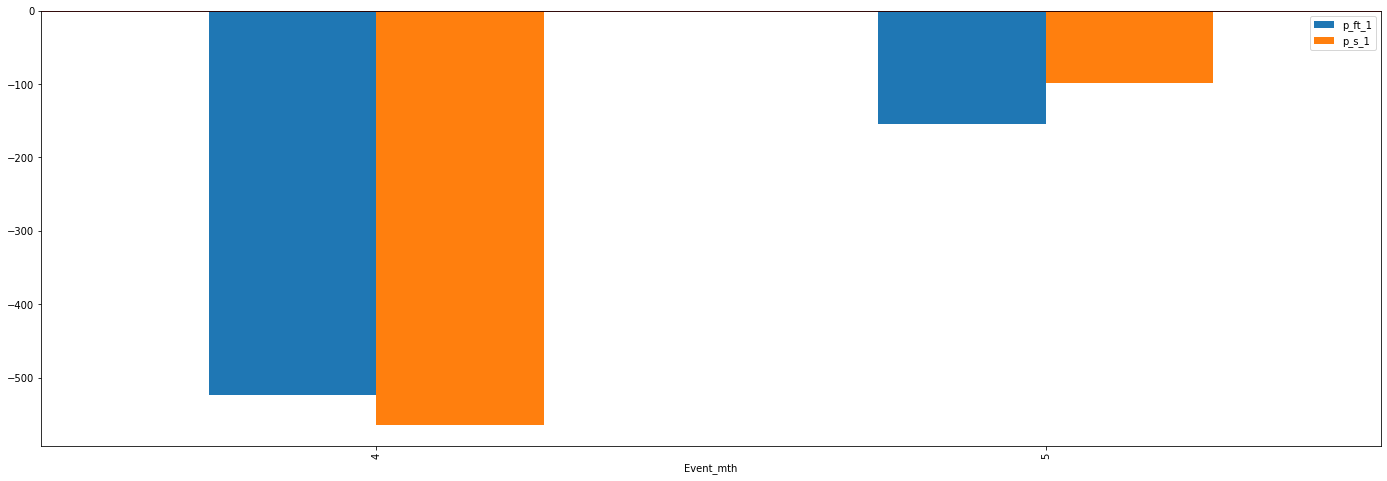

In [58]:

plt = df_plot.plot(x= rupvar[0], y=['p_ft_1','p_s_1'], figsize = (24,8), kind= 'bar')
plt.axhline(y=0, color='r', linestyle='-')


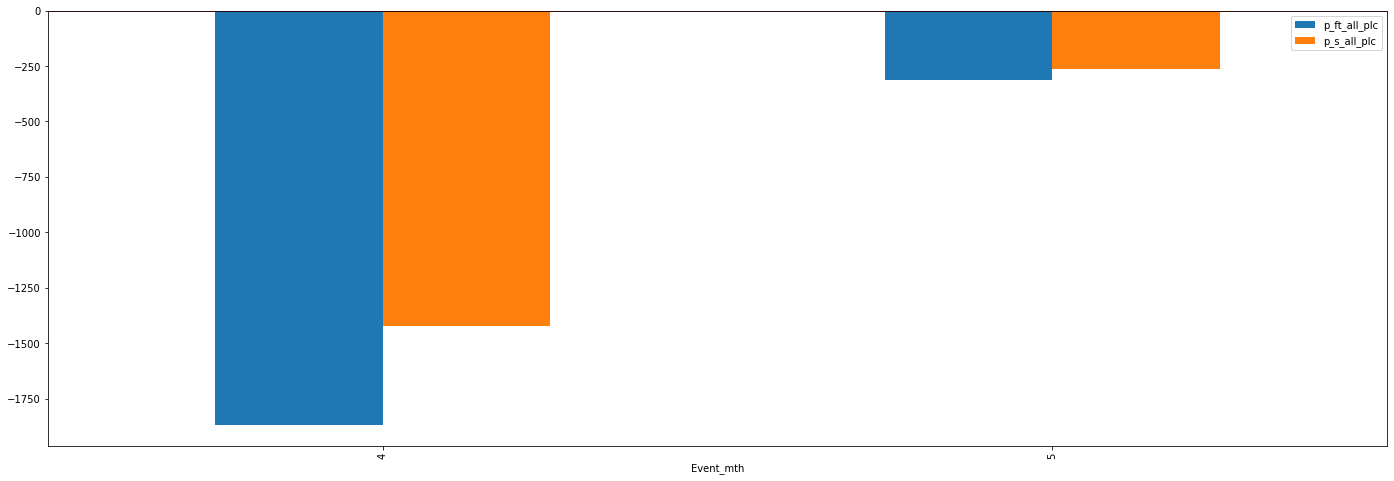

In [59]:

plt = df_plot.plot(x= rupvar[0], y=['p_ft_all_plc','p_s_all_plc'], figsize = (24,8), kind= 'bar')
plt.axhline(y=0, color='r', linestyle='-')


In [ ]:

df_eval_v2['Event_wk'] = df_eval_v2['Event_Dt'].apply(lambda x : pd.to_datetime(x, format = '%Y-%m-%d').week)


In [ ]:

print(df_eval_v2['Event_wk'].value_counts())


In [ ]:

#rupvar = ['Event_Dt']
rupvar = ['Event_wk']

df_plot_wk = df_eval_v2[ df_eval_v2.ttflag == 'Test' ].groupby(rupvar).agg({'h_ft_1':'sum','p_ft_1':'sum','h_ft_all_plc':'sum','p_ft_all_plc':'sum'\
                                ,'h_s_1':'sum','p_s_1':'sum','h_s_all_plc':'sum','p_s_all_plc':'sum'\
                                #,'h_rand_1':'sum','p_rand_1':'sum','h_rand_all_plc':'sum','p_rand_all_plc':'sum'\
                                                                           })\
                    .reset_index()

print(df_plot_wk.shape)
print()

print(df_plot_wk.columns.values.tolist())
print()

print(datetime.now())


In [ ]:

plt = df_plot_wk.plot(x= rupvar[0], y=['p_ft_1','p_s_1'], figsize = (24,8), kind= 'bar')
plt.axhline(y=0, color='r', linestyle='-')


In [ ]:

plt = df_plot_wk.plot(x= rupvar[0], y=['p_ft_all_plc','p_s_all_plc'], figsize = (24,8), kind= 'bar')
plt.axhline(y=0, color='r', linestyle='-')


### ft_sp groups profitability

In [ ]:

df_eval_v2['ft_sp_bins'] = pd.cut( df_eval_v2['ft_sp'], [-999,0,1,1.25,1.50,1.75,2.0,2.25,2.5,2.75,]


In [ ]:

df_eval_v2['ft_sp_groups'] = df_eval_v2['ft_sp'].apply(lambda x : 'U001.5' if x <=1.5 \
                                                       else 'U002' if x<=2 \
                                                       else 'U003' if x<=3 \
                                                       else 'U004' if x<=4 \
                                                       else 'U005' if x<=5 \
                                                       else 'U007' if x<=7 \
                                                       else 'U010' if x<=10 \
                                                       else 'U015' if x<=15 \
                                                       else 'U025' if x<=25 \
                                                       else 'U040' if x<=40 \
                                                       else 'U060' if x<=60 \
                                                       else 'U100' if x<=100 else 'Other')

print(df_eval_v2['ft_sp_groups'].value_counts())
                                                       

In [ ]:

print(df_eval_v2.columns.values.tolist())


In [ ]:


df_eval = df_eval_v2.groupby(['ttflag'])\
.agg({'ft_1':'sum', 'h_ft_1':'sum', 'p_ft_1':'sum', 'ft_all_plc':'sum', 'h_ft_all_plc':'sum', 'p_ft_all_plc':'sum', 'ft_lay_last':'sum', 'h_ft_lay_last':'sum', 'p_ft_lay_last':'sum' ''\
      , 's_1':'sum', 'h_s_1':'sum', 'p_s_1' :'sum' ,'s_all_plc':'sum', 'h_s_all_plc':'sum', 'p_s_all_plc':'sum', 's_lay_last':'sum', 'h_s_lay_last':'sum', 'p_s_lay_last':'sum'\
      #, 'rand_1':'sum', 'h_rand_1':'sum', 'p_rand_1' :'sum' ,'rand_all_plc':'sum', 'h_rand_all_plc':'sum', 'p_rand_all_plc':'sum', 'rand_lay_last':'sum', 'h_rand_lay_last':'sum', 'p_rand_lay_last':'sum'\
      ,'@id_RACE':'nunique' })\
.reset_index()\
.transpose()


In [ ]:

display(df_eval)


In [ ]:

df_eval_v2['ft_spgp_over1.25'] = df_eval_v2['ft_sp'].apply(lambda x : 'Over 1.25' if (x >=1.25) else 'Under 1.25')

df_eval_v2['ft_spgp_over1.5'] = df_eval_v2['ft_sp'].apply(lambda x : 'Over 1.5' if x >=1.5 else 'Under 1.5')

df_eval_v2['ft_spgp_over1.75'] = df_eval_v2['ft_sp'].apply(lambda x : 'Over 1.75' if x >=1.75 else 'Under 1.75')

df_eval_v2['ft_spgp_over2.0'] = df_eval_v2['ft_sp'].apply(lambda x : 'Over 2.0' if x >=2.0 else 'Under 2.0')

df_eval_v2['ft_spgp_over2.5'] = df_eval_v2['ft_sp'].apply(lambda x : 'Over 2.5' if x >=2.5 else 'Under 2.5')

df_eval_v2['ft_spgp_over3.0'] = df_eval_v2['ft_sp'].apply(lambda x : 'Over 3.0' if x >=3.0 else 'Under 3.0')

df_eval_v2['ft_spgp_over4.0'] = df_eval_v2['ft_sp'].apply(lambda x : 'Over 4.0' if x >=4.0 else 'Under 4.0')

df_eval_v2['ft_spgp_over5.0'] = df_eval_v2['ft_sp'].apply(lambda x : 'Over 5.0' if x >=5.0 else 'Under 5.0')
                                                       


In [ ]:

df_eval_spgp_0125 = df_eval_v2.groupby(['ft_spgp_over1.25','ttflag'])\
.agg({'ft_1':'sum', 'h_ft_1':'sum', 'p_ft_1':'sum', 'ft_all_plc':'sum', 'h_ft_all_plc':'sum', 'p_ft_all_plc':'sum', 'ft_lay_last':'sum', 'h_ft_lay_last':'sum', 'p_ft_lay_last':'sum' ''\
      , 's_1':'sum', 'h_s_1':'sum', 'p_s_1' :'sum' ,'s_all_plc':'sum', 'h_s_all_plc':'sum', 'p_s_all_plc':'sum', 's_lay_last':'sum', 'h_s_lay_last':'sum', 'p_s_lay_last':'sum'\
      , 'rand_1':'sum', 'h_rand_1':'sum', 'p_rand_1' :'sum' ,'rand_all_plc':'sum', 'h_rand_all_plc':'sum', 'p_rand_all_plc':'sum', 'rand_lay_last':'sum', 'h_rand_lay_last':'sum', 'p_rand_lay_last':'sum'\
      ,'@id_RACE':'nunique' })\
.reset_index()\
.transpose()


In [ ]:

display(df_eval_spgp_0125)


In [ ]:

df_eval_spgp_0150 = df_eval_v2.groupby(['ft_spgp_over1.5','ttflag'])\
.agg({'ft_1':'sum', 'h_ft_1':'sum', 'p_ft_1':'sum', 'ft_all_plc':'sum', 'h_ft_all_plc':'sum', 'p_ft_all_plc':'sum', 'ft_lay_last':'sum', 'h_ft_lay_last':'sum', 'p_ft_lay_last':'sum' ''\
      , 's_1':'sum', 'h_s_1':'sum', 'p_s_1' :'sum' ,'s_all_plc':'sum', 'h_s_all_plc':'sum', 'p_s_all_plc':'sum', 's_lay_last':'sum', 'h_s_lay_last':'sum', 'p_s_lay_last':'sum'\
      , 'rand_1':'sum', 'h_rand_1':'sum', 'p_rand_1' :'sum' ,'rand_all_plc':'sum', 'h_rand_all_plc':'sum', 'p_rand_all_plc':'sum', 'rand_lay_last':'sum', 'h_rand_lay_last':'sum', 'p_rand_lay_last':'sum'\
      ,'@id_RACE':'nunique' })\
.reset_index().transpose()


In [ ]:

display(df_eval_spgp_0150)


In [ ]:

df_eval_spgp_0200 = df_eval_v2.groupby(['ft_spgp_over2.0','ttflag'])\
.agg({'ft_1':'sum', 'h_ft_1':'sum', 'p_ft_1':'sum', 'ft_all_plc':'sum', 'h_ft_all_plc':'sum', 'p_ft_all_plc':'sum', 'ft_lay_last':'sum', 'h_ft_lay_last':'sum', 'p_ft_lay_last':'sum' ''\
      , 's_1':'sum', 'h_s_1':'sum', 'p_s_1' :'sum' ,'s_all_plc':'sum', 'h_s_all_plc':'sum', 'p_s_all_plc':'sum', 's_lay_last':'sum', 'h_s_lay_last':'sum', 'p_s_lay_last':'sum'\
      , 'rand_1':'sum', 'h_rand_1':'sum', 'p_rand_1' :'sum' ,'rand_all_plc':'sum', 'h_rand_all_plc':'sum', 'p_rand_all_plc':'sum', 'rand_lay_last':'sum', 'h_rand_lay_last':'sum', 'p_rand_lay_last':'sum'\
      ,'@id_RACE':'nunique' }).reset_index().transpose()


In [ ]:

display(df_eval_spgp_0200)


In [ ]:

df_eval_spgp_0250 = df_eval_v2.groupby(['ft_spgp_over2.5','ttflag'])\
.agg({'ft_1':'sum', 'h_ft_1':'sum', 'p_ft_1':'sum', 'ft_all_plc':'sum', 'h_ft_all_plc':'sum', 'p_ft_all_plc':'sum', 'ft_lay_last':'sum', 'h_ft_lay_last':'sum', 'p_ft_lay_last':'sum' ''\
      , 's_1':'sum', 'h_s_1':'sum', 'p_s_1' :'sum' ,'s_all_plc':'sum', 'h_s_all_plc':'sum', 'p_s_all_plc':'sum', 's_lay_last':'sum', 'h_s_lay_last':'sum', 'p_s_lay_last':'sum'\
      , 'rand_1':'sum', 'h_rand_1':'sum', 'p_rand_1' :'sum' ,'rand_all_plc':'sum', 'h_rand_all_plc':'sum', 'p_rand_all_plc':'sum', 'rand_lay_last':'sum', 'h_rand_lay_last':'sum', 'p_rand_lay_last':'sum'\
      ,'@id_RACE':'nunique' })\
.reset_index().transpose()


In [ ]:

display(df_eval_spgp_0250)


In [ ]:

df_eval_spgp_0300 = df_eval_v2.groupby(['ft_spgp_over3.0','ttflag'])\
.agg({'ft_1':'sum', 'h_ft_1':'sum', 'p_ft_1':'sum', 'ft_all_plc':'sum', 'h_ft_all_plc':'sum', 'p_ft_all_plc':'sum', 'ft_lay_last':'sum', 'h_ft_lay_last':'sum', 'p_ft_lay_last':'sum' ''\
      , 's_1':'sum', 'h_s_1':'sum', 'p_s_1' :'sum' ,'s_all_plc':'sum', 'h_s_all_plc':'sum', 'p_s_all_plc':'sum', 's_lay_last':'sum', 'h_s_lay_last':'sum', 'p_s_lay_last':'sum'\
      , 'rand_1':'sum', 'h_rand_1':'sum', 'p_rand_1' :'sum' ,'rand_all_plc':'sum', 'h_rand_all_plc':'sum', 'p_rand_all_plc':'sum', 'rand_lay_last':'sum', 'h_rand_lay_last':'sum', 'p_rand_lay_last':'sum'\
      ,'@id_RACE':'nunique' })\
.reset_index().transpose()


In [ ]:

display(df_eval_spgp_0300)


#### BY Grade and FT_SP grop

In [ ]:

df_eval_spgp_0200_rg = df_eval_v2.groupby(['ft_spgp_over2.0','RaceGrade','ttflag'])\
.agg({'ft_1':'sum', 'h_ft_1':'sum', 'p_ft_1':'sum', 'ft_all_plc':'sum', 'h_ft_all_plc':'sum', 'p_ft_all_plc':'sum', 'ft_lay_last':'sum', 'h_ft_lay_last':'sum', 'p_ft_lay_last':'sum' ''\
      , 's_1':'sum', 'h_s_1':'sum', 'p_s_1' :'sum' ,'s_all_plc':'sum', 'h_s_all_plc':'sum', 'p_s_all_plc':'sum', 's_lay_last':'sum', 'h_s_lay_last':'sum', 'p_s_lay_last':'sum'\
      , 'rand_1':'sum', 'h_rand_1':'sum', 'p_rand_1' :'sum' ,'rand_all_plc':'sum', 'h_rand_all_plc':'sum', 'p_rand_all_plc':'sum', 'rand_lay_last':'sum', 'h_rand_lay_last':'sum', 'p_rand_lay_last':'sum'\
      ,'@id_RACE':'nunique' }).reset_index().transpose()


In [ ]:

display(df_eval_spgp_0200_rg)


In [ ]:

df_eval_spgp_0200_rg.to_csv(f'{fileloc}/evaluation_2022-12-12_under2byrg_{mid}.csv', index = True)


## Export the files 

In [ ]:

# Classic overestimation of Placement problems -- placing top 3 for 8, and also 3 for 7,6,5,4,3,2,1 racers (fix)
# Classic using WIN price for PLACE issue

df_eval = df_eval_v2.groupby(['preds_tie','ttflag'])\
.agg({'ft_1':'sum', 'h_ft_1':'sum', 'p_ft_1':'sum', 'ft_all_plc':'sum', 'h_ft_all_plc':'sum', 'p_ft_all_plc':'sum', 'ft_lay_last':'sum', 'h_ft_lay_last':'sum', 'p_ft_lay_last':'sum' ''\
      , 's_1':'sum', 'h_s_1':'sum', 'p_s_1' :'sum' ,'s_all_plc':'sum', 'h_s_all_plc':'sum', 'p_s_all_plc':'sum', 's_lay_last':'sum', 'h_s_lay_last':'sum', 'p_s_lay_last':'sum'\
      , 'rand_1':'sum', 'h_rand_1':'sum', 'p_rand_1' :'sum' ,'rand_all_plc':'sum', 'h_rand_all_plc':'sum', 'p_rand_all_plc':'sum', 'rand_lay_last':'sum', 'h_rand_lay_last':'sum', 'p_rand_lay_last':'sum'\
      ,'@id_RACE':'nunique' })\
.reset_index()\
.transpose()


In [ ]:

df_eval


In [ ]:

#df_eval.to_csv(f'{fileloc}/evaluation_2022-10-18_extended_totals.csv', index = True)
#df_eval.to_csv(f'{fileloc}/evaluation_2022-10-27_extended_totals.csv', index = True)
df_eval.to_csv(f'{fileloc}/evaluation_2022-12-22_extended_totals_{mid}.csv', index = True)


In [ ]:

df_res = df_eval.groupby(['ttflag','RaceGrade_H1'])\
.agg({'ft_1':'sum', 'h_ft_1':'sum', 'p_ft_1':'sum', 'ft_all_plc':'sum', 'h_ft_all_plc':'sum', 'p_ft_all_plc':'sum'\
      , 's_1':'sum', 'h_s_1':'sum', 'p_s_1' :'sum' ,'s_all_plc':'sum', 'h_s_all_plc':'sum', 'p_s_all_plc':'sum'\
      , 'rand_1':'sum', 'h_rand_1':'sum', 'p_rand_1' :'sum' ,'rand_all_plc':'sum', 'h_rand_all_plc':'sum', 'p_rand_all_plc':'sum'\
      ,'@id_RACE':'nunique' })\
.reset_index()


In [ ]:

df_res


In [ ]:

#df_res.to_csv(f'{fileloc}/evaluation_2022-10-18_extended_bytrack.csv', index = True)
#df_res.to_csv(f'{fileloc}/evaluation_2022-10-27_extended_bytrack.csv', index = True)
df_res.to_csv(f'{fileloc}/evaluation_2022-12-22_extended_byracegrade_{mid}.csv', index = True)


In [ ]:


#df_find_pft = df_eval_v2.groupby(['preds_tie','ttflag','RaceGrade_H1','Winner_preds','Top3_preds','ft_sp_groups'])\
df_find_pft = df_eval_v2.groupby(['ttflag','RaceGrade_H1','Winner_preds','Top3_preds','ft_sp_groups'])\
.agg({'ft_1':'sum', 'h_ft_1':'sum', 'p_ft_1':'sum', 'ft_all_plc':'sum', 'h_ft_all_plc':'sum', 'p_ft_all_plc':'sum'\
      , 's_1':'sum', 'h_s_1':'sum', 'p_s_1' :'sum' ,'s_all_plc':'sum', 'h_s_all_plc':'sum', 'p_s_all_plc':'sum'\
      , 'rand_1':'sum', 'h_rand_1':'sum', 'p_rand_1' :'sum' ,'rand_all_plc':'sum', 'h_rand_all_plc':'sum', 'p_rand_all_plc':'sum'\
      ,'@id_RACE':'nunique' })\
.reset_index()


In [ ]:

#df_res.to_csv(f'{fileloc}/evaluation_2022-10-18_extended_bytrack.csv', index = True)
#df_res.to_csv(f'{fileloc}/evaluation_2022-10-27_extended_bytrack.csv', index = True)
df_find_pft.to_csv(f'{fileloc}/evaluation_sectional_{mid}.csv', index = True)


In [ ]:

print("THE END")
